##TASK-1
Image dataset- Covid-19 and Normal X-rays images

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
classes=os.listdir("drive/MyDrive/covid_chest_x-rays")

In [ ]:
print("DATASET:")
for c in classes:
   print(c,len(os.listdir("drive/MyDrive/covid_chest_x-rays/"+c)))

DATASET:
Covid-19 838
Normal 841


In [ ]:
from tensorflow.keras import utils

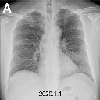

In [ ]:
img=utils.load_img("/content/drive/MyDrive/covid_chest_x-rays/Covid-19/Covid_10.png",target_size=(100,100))
img

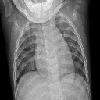

In [ ]:
utils.load_img("/content/drive/MyDrive/covid_chest_x-rays/Normal/Normal_10.png",target_size=(100,100))

In [ ]:
img=np.array(img)
img.shape

(100, 100, 3)

In [ ]:
data=[]
labels=[]
folder="/content/drive/MyDrive/covid_chest_x-rays/Covid-19"
for img_name in os.listdir(folder):
  img_path=folder+"/"+img_name
  img=utils.load_img(img_path,target_size=(100,100))
  img=np.array(img)
  data.append(img)
  labels.append("Covid-19")

In [ ]:
folder="/content/drive/MyDrive/covid_chest_x-rays/Normal"
for img_name in os.listdir(folder):
  img_path=folder+"/"+img_name
  img=utils.load_img(img_path,target_size=(100,100))
  img=np.array(img)
  data.append(img)
  labels.append("Normal")

In [ ]:
Data=np.array(data)
Labels=np.array(labels)
Data.shape

(1679, 100, 100, 3)

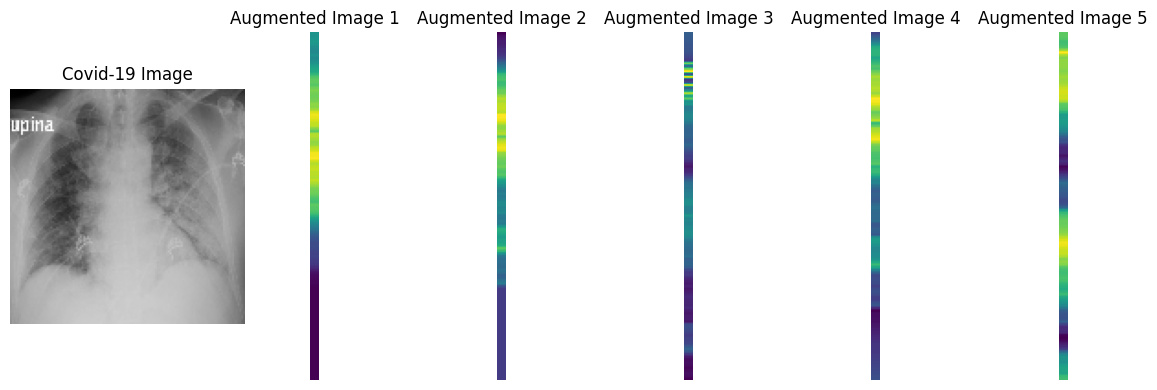

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from skimage import io
from skimage.transform import rotate
import matplotlib.pyplot as plt
# Applying data augmentation
# datagen = ImageDataGenerator(
#     rescale=1.0 / 255.0,
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode="nearest"
# )
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Path to your dataset directory
dataset_directory = "/content/drive/MyDrive/covid_chest_x-rays/Covid-19"


# Load a sample original image from the dataset
original_image_filename = "Covid_100.png"
original_image_path = os.path.join(dataset_directory, original_image_filename)

# Load the original image and convert it to a numpy array
original_image = io.imread(original_image_path)

# If the original image is single-channel (grayscale), add a channel dimension
if len(original_image.shape) == 2:
    original_image = np.expand_dims(original_image, axis=-1)

# Initialize an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Reshape the image to fit the generator's requirements
#original_image_array = original_image.reshape((1,) + original_image.shape)

# Generate augmented images
augmented_images = []
num_augmented_images = 5  # Generate 5 augmented images for demonstration
for _ in range(num_augmented_images):
    augmented_image = datagen.random_transform(original_image)
    augmented_images.append(augmented_image[0])  # Remove the added batch dimension


# Display the original and augmented images
fig, axes = plt.subplots(1, num_augmented_images + 1, figsize=(12, 4))
original_png_filename = "Covid_100.png"
plt.imsave(original_png_filename, original_image)
axes[0].imshow(original_image)
axes[0].set_title("Covid-19 Image")
for i in range(num_augmented_images):
    axes[i + 1].imshow(augmented_images[i].astype(int))
    axes[i + 1].set_title(f"Augmented Image {i+1}")
    augmented_png_filename = f"augmented_image_{i+1}.png"
    plt.imsave(augmented_png_filename, augmented_image)
for ax in axes:
    ax.axis("off")
plt.tight_layout()
plt.show()





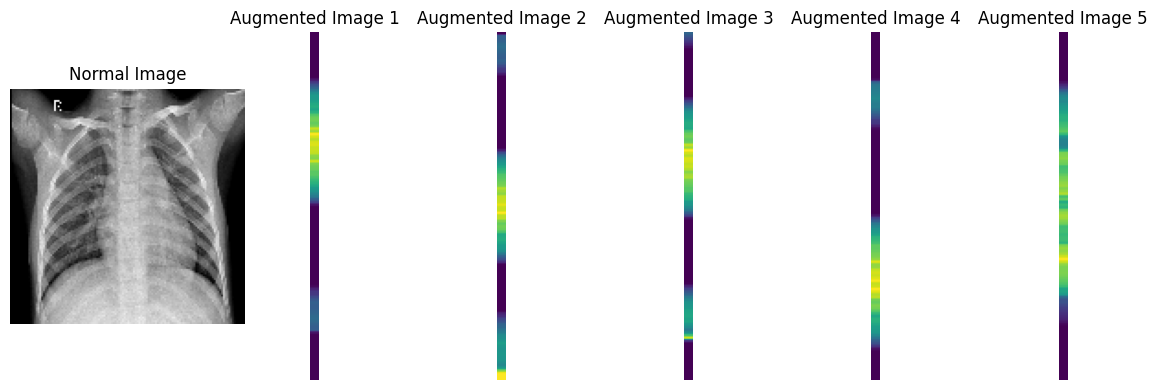

In [ ]:
# Path to your dataset directory
dataset_directory = "/content/drive/MyDrive/covid_chest_x-rays/Normal"


# Load a sample original image from the dataset
original_image_filename = "Normal_100.png"
original_image_path = os.path.join(dataset_directory, original_image_filename)

# Load the original image and convert it to a numpy array
original_image = io.imread(original_image_path)

# If the original image is single-channel (grayscale), add a channel dimension
if len(original_image.shape) == 2:
    original_image = np.expand_dims(original_image, axis=-1)

# Initialize an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Generate augmented images
augmented_images = []
num_augmented_images = 5  # Generate 5 augmented images for demonstration
for _ in range(num_augmented_images):
    augmented_image = datagen.random_transform(original_image)
    augmented_images.append(augmented_image[0])  # Remove the added batch dimension


# Display the original and augmented images
fig, axes = plt.subplots(1, num_augmented_images + 1, figsize=(12, 4))
axes[0].imshow(original_image)
original_png_filename = "Normal_100.png"
plt.imsave(original_png_filename, original_image)
axes[0].set_title("Normal Image")
for i in range(num_augmented_images):
    axes[i + 1].imshow(augmented_images[i].astype(int))
    axes[i + 1].set_title(f"Augmented Image {i+1}")
    augmented_png_filename = f"augmented_image_{i+1}.png"
    plt.imsave(augmented_png_filename, augmented_image)
for ax in axes:
    ax.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
original_image.shape

(128, 128, 3)

In [ ]:
import os
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

augmented_feature_vectors = []
for image in datagen.flow(Data, batch_size=1, shuffle=False):
    # Converting the augmented color image to grayscale
    gray_image = rgb2gray(image[0])

   # Applying HOG to the entire matrix
    hog_feature = hog(gray_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))

    augmented_feature_vectors.append(hog_feature)
    if len(augmented_feature_vectors) == len(Data):
        break

In [ ]:
x = np.array(augmented_feature_vectors)
num_samples, num_features = x.shape[0], np.prod(x.shape[1:])
x = x.reshape(num_samples, num_features)

In [ ]:
x.shape

(1679, 1296)

In [ ]:
# Shuffling the dataset
from sklearn.utils import shuffle
X, y = shuffle(x,Labels, random_state=42)


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Creating  an SVM classifier with RBF kernel and a pipeline for preprocessing
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

# Training the SVM classifier
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9791666666666666


Hyperparamter -Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn import svm, datasets

svm_classifier = svm.SVC()

# Define a parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']    # Kernel coefficient
}

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

# To Get the best hyperparameters from the grid search
best_params = grid_search.best_params_


best_svm_classifier = svm.SVC(**best_params)
best_svm_classifier.fit(X_train, y_train)

y_pred = best_svm_classifier.predict(X_test)

# Print the best hyperparameters
print("Best hyperparameters:", best_params)


Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


Model Evaluation

In [ ]:
y_pred

array(['Covid-19', 'Covid-19', 'Normal', 'Normal', 'Covid-19', 'Covid-19',
       'Normal', 'Normal', 'Normal', 'Covid-19', 'Covid-19', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Covid-19',
       'Covid-19', 'Covid-19', 'Covid-19', 'Covid-19', 'Normal',
       'Covid-19', 'Normal', 'Covid-19', 'Covid-19', 'Covid-19',
       'Covid-19', 'Covid-19', 'Normal', 'Covid-19', 'Covid-19',
       'Covid-19', 'Covid-19', 'Normal', 'Normal', 'Normal', 'Covid-19',
       'Covid-19', 'Normal', 'Normal', 'Normal', 'Normal', 'Covid-19',
       'Covid-19', 'Covid-19', 'Covid-19', 'Covid-19', 'Covid-19',
       'Normal', 'Normal', 'Normal', 'Covid-19', 'Normal', 'Covid-19',
       'Covid-19', 'Covid-19', 'Normal', 'Normal', 'Normal', 'Covid-19',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Covid-19', 'Covid-19', 'Covid-19', 'Normal', 'Normal',
       'Covid-19', 'Covid-19', 'Covid-19', 'Normal', 'Covid-19',
       'Covid-19', 'Normal', '

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Precision
precision = precision_score(y_test, y_pred,pos_label='Covid-19')
print("Precision", precision)
# Recall
recall = recall_score(y_test, y_pred,pos_label='Covid-19')
print("Recall", recall)
# F1-Score
f1 = f1_score(y_test, y_pred,pos_label='Covid-19')
print("F1 Score", f1)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(conf_matrix)
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Class- Report")
print(class_report)
# ROC Curve and AUC
# fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
# roc_auc = auc(fpr, tpr)


Accuracy: 0.9702380952380952
Precision 0.9759036144578314
Recall 0.9642857142857143
F1 Score 0.970059880239521
Confusion Matrix
[[162   6]
 [  4 164]]
Class- Report
              precision    recall  f1-score   support

    Covid-19       0.98      0.96      0.97       168
      Normal       0.96      0.98      0.97       168

    accuracy                           0.97       336
   macro avg       0.97      0.97      0.97       336
weighted avg       0.97      0.97      0.97       336



Confusion Matrix:
[[162   6]
 [  4 164]]


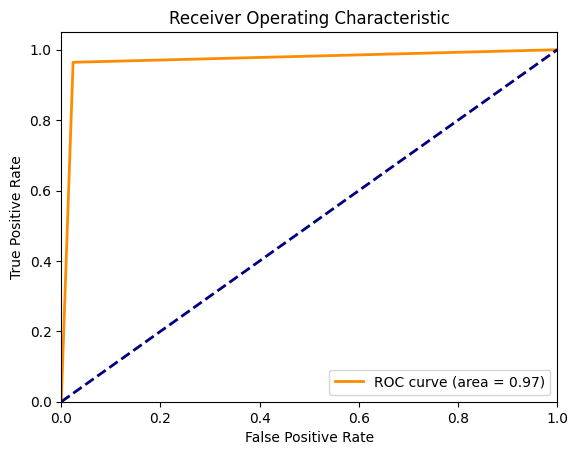

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

label_mapping = {'Normal': 0, 'Covid-19': 1}
y_true_numeric = np.array([label_mapping[label] for label in y_test])
y_pred_numeric = np.array([label_mapping[label] for label in y_pred])
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true_numeric, y_pred_numeric)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
import plotly.express as px


# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y)
fig.update_layout(title='3D Scatter Plot of SVM Results')
fig.show()
